# TP Supervised Learning

Ce notebook est basé sur le numerical tour de *Gabriel Peyré* qui introduit les notions essentielles à la regression linéaire et logistique.

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

Fonctions utiles :

In [89]:
#  convert to a column vector
def MakeCol(y): return y.reshape(-1,1)
#  convert to a row vector
def MakeRow(y): return y.reshape(1,-1)
# find non zero/true elements
def find(x): return np.nonzero(x)[0]

## Exercice 1 : Linear Regression

### Data Simulation

Tout d'abord on simule un problème de régression.

In [90]:
from sklearn import datasets
X, y, coef = datasets.make_regression(n_samples = 1000, n_features = 100,
                                n_informative = 4, n_targets = 1,
                                noise = 10.0, coef = True)

**Q: Que fait le code ci-dessus, que font les paramètres ?**

 Ce code génère un ensemble de données synthétiques pour une tâche de régression avec 100 échantillons, 10 caractéristiques dont 4 sont informatives, une seule cible à prédire, et ajoute du bruit gaussien. Les **données d'entrée**, les **valeurs cibles** et les **coefficients** utilisés pour générer les données sont stockés dans les variables **X**, **y** et **coef**, respectivement.

**Q : Séparer le dataset en un ensemble d'apprentissage et de test.**

In [91]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test= train_test_split(X, y, test_size=0.5)

**Q : Pourquoi n'utilise-t-on pas d'ensemble de validation ici ?**

Il n'y a pas d'hyperparamètre

###  Least square solution

On rappelle que l'estimateur des moindres carrés est donné par : $\hat{\beta} = (X^T X)^{-1} X^Ty $

**Q: Coder une fonction qui permet de calculer une estimation de celui-ci à partir des données.**

In [92]:
def test(X,y) :
    B = np.linalg.inv(np.dot(np.transpose(X),X))
    B = np.dot(B,np.transpose(X))
    return np.dot(B,y)

def reg_OLS(X,y):
    return np.linalg.inv(np.transpose(X)@X)@np.transpose(X)@y

assert(test(X,y).all() == reg_OLS(X,y).all())
print(reg_OLS(X,y))

[ 5.05381405e-01 -3.04602192e-01  4.35306743e-01 -1.64666041e-01
 -1.33832338e-01  2.92521292e-01  3.71885866e-01  4.06146765e-01
  6.22680300e-02  1.03866028e-01  5.08481780e-01  2.13634301e-01
 -3.45879971e-01  2.22739365e-01 -1.76496983e-01  4.50187088e-01
  1.45916092e-01 -5.70278743e-01 -2.27123520e-01 -1.87446656e-01
 -3.64786857e-01  1.84042717e-02 -4.60519422e-02  7.88423227e-01
 -1.31270696e-01 -2.40173339e-01  8.30261747e+01  4.86225718e+00
 -2.09237994e-01 -1.33377516e-01 -1.03773078e-01  7.58246596e-02
 -8.60214523e-02  3.36117867e-02 -4.38836623e-01 -2.58217990e-02
 -3.62020153e-01 -1.06282743e-01  9.44139608e-03 -5.85856534e-01
  2.70621349e-01  8.99866988e+01  3.09132233e-02 -2.17065154e-01
 -1.90040913e-01 -5.10800649e-01  3.42456727e-01 -4.57055222e-02
 -8.56593561e-02  1.08508687e-02  6.97621850e-01  3.26338145e-01
  7.41130934e-02  2.92919266e-01  9.49083189e-02 -9.32385306e-02
  1.18780466e-02 -1.59885280e-01  1.03113897e-01 -1.35485260e-01
  6.41484419e-01  3.63422

**Q: Donner un avis sur les valeurs des paramètres. Que constate-t-on et pourquoi ?**

**Q: Créer une fonction `reg_lin` qui permet de prédire les labels `y` pour de nouvelles données `X`.**

In [93]:
def reg_lin(X_train,X_test,y):
    coeff = reg_OLS(X_train,y)
    y_pred = X_test @ coeff
    return y_pred

Y_pred = reg_lin(X_train,X_test,Y_train)
print(Y_pred)
#données proche de 0 si on augmente n_samples (=100), n_features (=10)

[ 415.49596637  137.41883756 -112.47252159  291.85761054 -111.28905171
  174.98964534  -16.37005349   80.4847938  -151.13568073  197.30983869
 -177.96251239  166.0064946  -124.18971439 -177.94859542   74.57649009
  286.72662409   29.87222133  -46.8310844   208.75082733 -299.1905084
  168.2132336    86.75174636 -197.91750283   86.47972176   30.47504746
  141.25405986 -232.00687248  105.04818366  285.56971126   30.91396093
 -156.03875257 -121.78589559   29.47565637   23.80821125  -45.38262016
  189.44910518 -107.00648189   58.59924204   29.85597693  134.31698482
   59.66893114   74.19667459  101.9314815  -108.42571728   98.8876563
 -159.14768975  190.05997175 -271.01307763  132.36884211   53.60156031
 -159.08584824 -266.50489415  -35.74399461  199.37904065   16.20997011
  -24.35546081   42.37434629   57.69817322  221.3827908   103.25123861
  -54.79537813   31.73934803  209.49362021  109.09030272   90.80871913
  181.36889187 -161.41881059  138.6162211    -5.62246812 -118.70441028
   55.64

**Q : Tester sur l'ensemble de test. Quel taux d'erreur avez-vous ? Que pouvez-vous dire ?**

In [94]:
def root_mean_squared_error(y_true,y_pred):
    return math.sqrt(((y_true-y_pred)**2).mean())

print(np.var(Y_pred))
print(root_mean_squared_error(Y_train,Y_pred))

24060.897555642052
220.04684267979925


###  Descente de gradient

On rappelle que l'objectif est de minimiser $f(\beta) = \frac{1}{2} \| X\beta - y \|^2$

**Q: Coder la fonction de perte (loss) `f` qui prend en paramètres la matrice X, y et $\beta$.**

In [95]:
def f(X,y,B):
    return 0.5*np.linalg.norm(X@B-y)**2

On rappelle aussi que le gradient de $f$ est : $\nabla f(\beta) = X^T(X\beta - y)$.

**Q: Coder la fonction  `grad_f` qui prend en paramètre la matrice X, y et $\beta$**

In [96]:
def grad_f(X,y,B):
    return np.transpose(X) @ ((X@B) -y)

Maintenant, codons la descente de gradient, on rappelle que le passage de l'algorithme de l'étape $m$ à $m+1$ est donné par :
$$
\beta^{(m+1)} = \beta^{(m)} - \tau \nabla f(\beta^{(m)}),
$$
où $\tau$ est le pas de la descente.

**Q : Coder la fonction `Reg_lin_desc_grad` qui prend en entrée :`X`,`y`, `w` (initialisation de beta), `tau`, `n_iter` (le nombre d'itérations maximum), `tol` (la tolérance de la convergence).**

Dans un second temps, cette fonction doit aussi afficher l'evolution de l'erreur d'entraînement comme une fonction du nombre d'itération.

In [97]:
def Reg_lin_desc_grad(X,y,w,tau = 1/np.linalg.norm(X,2)**2 ,n_iter=50,tol = 1e3,plot=True):
    B = [w]
    for i in range(1,n_iter+1):
        B.append(B[i-1] - tau*grad_f(X,y,B[i-1]))
        error += abs(B[i]-B[i-1])
        if (error).all() < tol):
            return B[-1]
    return B[-1]

print(Reg_lin_desc_grad(X,y,np.ones(100)))

[ 4.60571503e+00 -4.51369937e-01  4.89259017e+00 -9.70468343e-01
 -3.86025510e+00 -2.49476470e+00 -3.50116677e+00 -1.77050593e+00
 -5.78778323e-01 -4.77108608e+00  1.43639105e+00  3.68953351e-01
 -2.23784907e+00  1.37455196e+00  5.78006516e+00  2.39011607e+00
  4.01314507e-01 -2.30675995e-01  7.13897954e-01  1.12092242e+00
 -2.72552007e+00  3.55182785e+00  7.11821479e+00 -4.54741450e+00
  6.67350099e+00 -2.98782912e+00  5.04345333e+01  8.12622908e+00
 -3.81468410e+00 -2.44591372e+00 -3.12243730e-01 -7.34440568e-01
 -5.69247722e+00  1.43739699e+00 -1.06210971e+00  1.47290750e+00
 -3.56774354e+00 -7.94100920e-01  2.07008527e+00 -2.76353414e+00
  3.38283395e-01  5.67534272e+01 -1.47714176e-01  1.89383261e+00
 -3.16469382e-02  2.95667251e-01  1.27517942e+00 -7.27993272e-01
  4.09186924e+00 -6.63950145e+00 -4.31724110e+00  3.27008118e+00
 -2.07808554e-01 -2.13755776e+00  3.95262873e-02  2.90501174e+00
  6.99769184e+00  3.04945812e+00 -1.12847133e+00  1.10322887e+00
  4.89697176e+00 -4.00248

La variable `tau` définie en amont est donnée par un critère du controle de norme, il ne faut pas que le pas de l'algorithme dépasse  :
$$
\tau_{max} = \dfrac{2}{\| X X^T\|_{op}},
$$
avec $\| .\|_{op}$ est la valeur propre maximal.

**Q : Tester pour différentes valeurs de $\tau$, que constatez-vous ?** (Convergence, estimation, etc.)

In [98]:
print(Reg_lin_desc_grad(X,y,np.ones(100),0.5))#10^3
print(Reg_lin_desc_grad(X,y,np.ones(100),1000))#10^6
#le tau qui minimise est tau = 1/np.linalg.norm(X,2)**2

[ 3.06754461e+03 -1.23334343e+03  3.31152269e+03 -1.67481992e+03
 -4.13249057e+03 -2.97118493e+03 -3.82709751e+03 -2.35522615e+03
 -1.34170017e+03 -4.90712302e+03  3.72136544e+02 -5.35684870e+02
 -2.75268645e+03  3.19544386e+02  4.06629161e+03  1.18324899e+03
 -5.08162748e+02 -1.04565034e+03 -2.42320585e+02  1.03840625e+02
 -3.16743495e+03  2.17124748e+03  5.20434482e+03 -4.71689753e+03
  4.82613004e+03 -3.39052035e+03  4.20434799e+04  6.06162853e+03
 -4.09373391e+03 -2.92963874e+03 -1.11502107e+03 -1.47408590e+03
 -5.69073654e+03  3.72992066e+02 -1.75275796e+03  4.03192615e+02
 -3.88371891e+03 -1.52482511e+03  9.11073090e+02 -3.19976469e+03
 -5.61768681e+02  4.74174959e+04 -9.75093978e+02  7.61175871e+02
 -8.76382527e+02 -5.98012340e+02  2.35031247e+02 -1.46860268e+03
  2.63053530e+03 -6.49615017e+03 -4.52114247e+03  1.93163101e+03
 -1.02620231e+03 -2.66739192e+03 -8.15851988e+02  1.62115119e+03
  5.10184392e+03  1.74399819e+03 -1.80919638e+03  8.87928354e+01
  3.31524909e+03 -1.18986

###  Scikit-Learn

In [99]:
from sklearn.linear_model import LinearRegression
Model_LinearReg = LinearRegression()

**Q: Que contient cet objet ? Comment mettre à jour ses poids ? Que dire des paramètres ?**

Cette instance représente un modèle de régression linéaire, un algorithme couramment utilisé pour résoudre des problèmes de régression, où l'objectif est de prédire une valeur numérique continue en fonction de variables d'entrée.

Voici ce que contient généralement un objet LinearRegression :

- Poids (coefficients) du modèle : Lorsque vous ajustez ce modèle aux données d'entraînement à l'aide de la méthode fit(), les poids du modèle sont calculés de manière à minimiser l'erreur quadratique moyenne entre les prédictions du modèle et les valeurs réelles dans l'ensemble d'entraînement. Ces poids correspondent aux coefficients de la régression linéaire, notamment le coefficient intercept (l'ordonnée à l'origine) et les coefficients associés à chaque variable d'entrée.

- Intercept (ordonnée à l'origine) : C'est le biais du modèle, qui représente la valeur prédite lorsque toutes les variables d'entrée sont nulles.

Pour mettre à jour les poids du modèle, vous devez utiliser la méthode fit(X, y) où X sont les données d'entraînement (matrice des variables d'entrée) et y sont les valeurs cibles correspondantes. Lors de l'exécution de fit(), les poids du modèle sont ajustés de manière à minimiser la perte définie, généralement l'erreur quadratique moyenne dans le cas de la régression linéaire.

###  OLS / Gradient descent / Scikit-learn (learning time)

Cette partie dépendra grandement de votre machine et de votre implémentation, toutefois elle permettra de vous faire une idée quant au choix de la méthode à privilégier.

In [100]:
from time import time 
t1 = time() 
#Quelque chose
t2 = time()
elapsed = t2 - t1 
print('Elapsed time is %f seconds.' % elapsed) 

Elapsed time is 0.000083 seconds.


**Q : Que fait le code ci-dessus ?**

**Q: Afficher l'évolution du temps de calcul en faisant varier le nombre d'individus dans le dataset  N = 100 : 100000 (pas logartihmique) et en laissant fixé p = 40.** 

**Q: Afficher l'évolution du temps de calcul en faisant varier le nombre de variables dans le dataset p = 40:5000 (pas logarithmique) et en laissant le nombre d'individus fixé N = 10000.**

###  Gradient descent / Scikit-learn (performances)

**Q: Comparer les performances de prédiction sur l'ensemble de test. Y a-t-il des différences ? Si oui, pourquoi ?**

## Exercice 2 : Logistic Regression

### Data Simulation

In [101]:
n = 1000 # number of sample
p = 2 # dimensionality
omega = np.array([1,.5])*2.5 # offset 
n1 = int(n/2)
X = np.vstack(( np.random.randn(n1,2), np.random.randn(n1,2)+np.ones([n1,1])*omega ))
y = np.vstack(( np.ones([n1,1]), -np.ones([n1,1]) ))

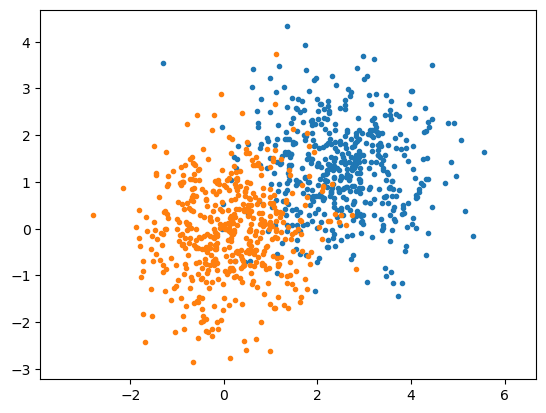

In [102]:
I = find(y==-1)
J = find(y==1)
plt.clf
plt.plot(X[I,0], X[I,1], '.')
plt.plot(X[J,0], X[J,1], '.')
plt.axis('equal');

###  Descente de gradient

On rappelle que l'objectif de minimiser $g(\beta) = \dfrac{1}{n} \sum_{i=1:n}  \log(1 + e^{-yi \langle X_i , \beta \rangle})$.

**Q: Coder la fonction de loss `g` qui prend en paramètre la matrice X, y et $\beta$.**

In [103]:
def g():
    pass

On rappelle aussi que le gradient de $g$ est : $$\nabla g(\beta) = \dfrac{1}{n} X^T y \odot \sigma(- y \ \odot <X,\beta>),$$
où $\odot$ est le produit élément par élément (* en python) et $\sigma$ est la fonction sigmoide.

**Q: Coder la fonction  `grad_g` qui prend en paramètre la matrice X, y et $\beta$.**

In [104]:
def grad_g():
    pass

Maintenant, codons la descente de gradient. On rappelle que le passage de l'algorithme de l'étape $m$ à $m+1$ est donné par :
$$
\beta^{(m+1)} = \beta^{(m)} - \tau \nabla g(\beta^{(m)}),
$$
où $\tau$ est le pas de la descente.

**Q : Coder la fonction `Reg_log_desc_grad` qui prend en entrée :`X`,`y`, `w` (initialisation de beta), `tau`, `n_iter` (le nombre d'itérations maximum), `tol` (la tolérence de la convergence).**

Dans un second temps, cette fonction doit aussi afficher l'évolution de l'erreur d'entraînement comme une fonction du nombre d'itération.

In [105]:
def Reg_log_desc_grad(X,y,w,tau = 1/np.linalg.norm(X,2)**2 ,n_iter=50,tol = 1e3,plot=True):
    pass

La variable `tau` définie en amont est donnée par un critère du contrôle de la norme, il ne faut pas que le pas de l'algorithme dépasse  :
$
\tau_{max} = \dfrac{2}{ 1/4\| X \|_{op}^2},
$
avec $\| .\|_{op}$ est la valeur propre maximale.

**Q : Tester différentes valeurs de $\tau$, que constatez-vous ?** (Convergence, estimation, ...)

###  Scikit-Learn

In [106]:
from sklearn.linear_model import LogisticRegression
Model_LogReg = LogisticRegression()

**Q: Que contient cet objet ? Comment mettre à jour ses poids ? Que dire des paramètres ?**

###  Gradient descent / Scikit-learn (learning time)

Cette partie dépendra grandement de votre machine et de votre implémentation, toutefois elle permettra d'avoir des idées de quand utiliser un algorithme plutôt que l'autre.

On pose $\beta^\star_j = (-1)^{j-1} \exp(-(j-1)/10)$.

Text(0.5, 1.0, 'Parameters')

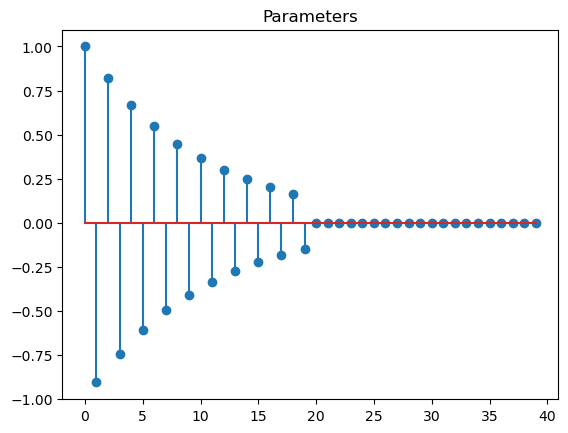

In [107]:
n_features = 40
n_samples = 2000

%matplotlib inline

idx = np.arange(n_features)
params = (-1) ** idx  * np.exp(-idx / 10.)
params[20:] = 0.
plt.stem(params)
plt.title("Parameters")

In [108]:
import numpy as np
import copy
def sigmoid(a):
    x = copy.deepcopy(a)
    if(x.size ==1) :
        if x >= 0:
            return 1.0 / (1.0 + np.exp(-x))
        else : 
            # Utilisez la formule sigmoid(x) = 1 - sigmoid(-x) pour x < 0
            return np.exp(x) / (1.0 + np.exp(x))
        
        
    neg_part = find(x<=0)
    pos_part = find(x>0)
    if pos_part.size >= 0:
        x[pos_part] = 1.0 / (1.0 + np.exp(-x[pos_part]))
        
    if neg_part.size >= 0: 
        x[neg_part] = np.exp(x[neg_part]) / (1.0 + np.exp(x[neg_part]))
    
    return x

In [109]:
from numpy.random import multivariate_normal
from scipy.linalg.special_matrices import toeplitz
from numpy.random import binomial
def simu_logreg(n_samples,params=params,rho=0.1):
    """ simulation in a logistic regression model 
    
    Parameters
    ----------
    coefs : `numpy.array`, shape=(n_features,)
        Coefficients of the model
    n_samples : `int`, 
        Number of samples to simulate
    rho : `float`, default=0.1
        Correlation of the features
    Returns
    -------
    X : `numpy.ndarray`, shape=(n_samples, n_features)
    Simulated features matrix. It samples of a centered Gaussian
    vector with covariance given by the Toeplitz matrix
    y : `numpy.array`, shape=(n_samples,)
                 Simulated labels
    """
    n_features = params.size
    
    cov = toeplitz(rho ** np.arange(0, n_features))
    
    features = multivariate_normal(np.zeros(n_features), cov, size=n_samples)
    
    pis = sigmoid(features.dot(params))
    
    labels = 2 * ( binomial(1,pis, n_samples) - 1)
    
    return((features,labels))

/tmp/ipykernel_10263/3800379213.py:2: DeprecationWarning: Please use `toeplitz` from the `scipy.linalg` namespace, the `scipy.linalg.special_matrices` namespace is deprecated.
  from scipy.linalg.special_matrices import toeplitz


In [110]:
X_perfs,y_perfs = simu_logreg(2000,params,rho = 0.1)
print(y_perfs.shape)
print(X_perfs.shape)

(2000,)
(2000, 40)


**Q: Que fait le code ci-dessus ? Détailler.**

**Q: Afficher l'évolution du temps de calcul en fonction du nombre d'individus dans le dataset  N = 100 : 100000 et p = 40** 

**Q: Afficher l'évolution du temps de calcul en fonction de variables dans le dataset  N = 10000 et p = 40:5000**

**Q: Afficher l'évolution du temps de calcul en faisant varier le nombre d'individus dans le dataset  N = 100 : 100000 (pas logartihmique) et en laissant fixé p = 40.**

**Q: Afficher l'évolution du temps de calcul en faisant varier le nombre de variables dans le dataset p = 40:5000 (pas logarithmique) et en laissant le nombre d'individus fixé N = 10000.**

###  Gradient descent / Scikit-learn (performances)

**Q: Comparer les performances de prédiction sur l'ensemble de test. Y a-t-il des différences ? Si oui, pourquoi ?**

###  Frontières de décision

En utilisant les fonctions de régression logistique (au choix : celle que vous avez implémentée ou celle de scikit-learn) on va maintenant tracer les frontières de décisions de notre modèle.

On génère une grille de points en 2D.

In [111]:
q = 201
tx = np.linspace( X[:,0].min(), X[:,0].max(),num=q) 
ty = np.linspace( X[:,1].min(), X[:,1].max(),num=q) 
[B,A] = np.meshgrid( ty,tx )
G = np.vstack([A.flatten(), B.flatten()]).transpose()

**Q: Calculer les probabilités de classe associées à chacun des vecteurs composant la grille.**

In [112]:
proba_pred = ... 

In [113]:
proba_class1 = proba_pred[:,0].reshape(q,q)

TypeError: 'ellipsis' object is not subscriptable

In [ ]:
plt.clf
plt.imshow(proba_class1.transpose(), origin="lower",  extent=[tx.min(),tx.max(),ty.min(),ty.max()])
plt.axis('equal')
plt.plot(X[I,0], X[I,1], '.')
plt.plot(X[J,0], X[J,1], '.')
plt.axis('off');

## Exercice 3 : Penalized Regression

In [ ]:
help(LogisticRegression)
help(LinearRegression)

**Q: Dans l'aide, quel est l'argument qui permet de gérer la pénalité utilisée ?**

**Q: [Regression] Comparer les différentes pénalisations en termes de performances sur l'ensemble d'apprentissage et de test ainsi que sur l'estimation des coefficients. Commenter.**

**Q: [Classification] Comparer les différentes pénalisations en termes de performances sur l'ensemble d'apprentissage et de test ainsi que sur l'estimation des coefficients. Commenter.**

**Q: Créer une procédure d'optimisation des hyper-paramètres.**

## Exercice 4 : Decision Tree and random Forest

### Arbre de décision

The DecisionTreeClassifier() of the library ‘tree’ implements the decision tree for classification.

In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

**Q: Quels sont les hyper-paramètres d'un arbre de décision ? Quelless sont les valeurs par défaut de `DecisionTreeClassifier()`?**

**Q: Calculer la prédiction des classes associées à toutes les entrées de l'ensemble des données de la grille et visualiser les frontières de décision.**

In [ ]:
from sklearn.tree import export_text
r = export_text(treefit); # treefit -> Model
print(r)

**Q: Que fait le code ci-dessus ?**

**Q: Créer une procédure d'optimisation des hyper-paramètres.**

### Forêts aléatoires

In [ ]:
from sklearn.ensemble import RandomForestClassifier

**Q: Quels sont les hyper-paramètres d'un arbre de décision ? Quelles sont les valeurs par défaut de `DecisionTreeClassifier()`?**

**Q: Calculer la prédiction des classes associées à toutes les entrées de l'ensemble de données de la grille et visualiser les frontières de décision.**

**Q: Créer une procédure d'optimisation des hyper-paramètres.**

## Exercice 5

**Q: Appliquer tout ce que vous avez vu au cours de ce TP au dataset [Maternal Health Risk](https://archive.ics.uci.edu/dataset/863/maternal+health+risk).**